In [1]:
import pandas
from shap.plots import beeswarm, bar, scatter, heatmap
from shap import Explanation
import matplotlib.pyplot as pl
import numpy
import math

In [2]:
bs = 64
num_epochs = 100
prefix = 'sans_block'

shap_df = pandas.read_csv(f'../../../results/{prefix}_bs={bs}_maxep={num_epochs}_acc/best_hp_shap_gradient.csv')

In [3]:
T = 3

In [4]:
def is_accurate(r, t):
    if r[f'is_correct@T-{T-t}'] == 1:
        return 1
    if r[f'is_wrong@T-{T-t}'] == 1:
        return 0
    return numpy.nan


# Overall SHAP

In [5]:
for t in range(T + 1):
    shap_df[f'is_accurate@T-{T-t}'] = shap_df.apply(lambda row: is_accurate(row, t), axis=1)
    shap_df[f'is_accurate@T-{T-t}_shap'] = shap_df[f'is_correct@T-{T-t}_shap'] + shap_df[f'is_wrong@T-{T-t}_shap']
    
    shap_df[f'change_probed@T-{T-t}'] = shap_df.apply(lambda row: row[f'change_fx@T-{T-t}'] if row[f'side_probed@T-{T-t}'] == 0 else row[f'change_vr@T-{T-t}'], axis=1)
    shap_df[f'change_probed@T-{T-t}_shap'] = shap_df.apply(lambda row: row[f'change_fx@T-{T-t}_shap'] if row[f'side_probed@T-{T-t}'] == 0 else row[f'change_vr@T-{T-t}_shap'], axis=1)
    
    shap_df[f'change_unprobed@T-{T-t}'] = shap_df.apply(lambda row: row[f'change_fx@T-{T-t}'] if row[f'side_probed@T-{T-t}'] == 1 else row[f'change_vr@T-{T-t}'], axis=1)
    shap_df[f'change_unprobed@T-{T-t}_shap'] = shap_df.apply(lambda row: row[f'change_fx@T-{T-t}_shap'] if row[f'side_probed@T-{T-t}'] == 1 else row[f'change_vr@T-{T-t}_shap'], axis=1)


In [6]:
columns = []
shap_columns = []
feature_names = []

for var, var_name, sep in [
    ('reward_vr_fx', 'Reward@VR>FX', '@'), 
    ('change_probed', 'Change@Probed', '@'), 
    ('change_unprobed', 'Change@Unprobed', '@'),
    ('side_probed', 'ProbedSide', '@'), 
    ('is_accurate', 'IsAccurate', '@'), 
    ('stimulus_time', 'StimulusDuration', '@'), 
    ('accrued_score', 'AccruedScore', 'Until'),
]:
    for t in range(T + 1):
        
        if t < T and var in ['stimulus_time', 'accrued_score']:
            continue
        
        col_name = f"{var}@T-{T-t}"
        columns.append(col_name)
        shap_columns.append(col_name + '_shap')
        
        if T-t == 0:
            feature_names.append(f'{var_name} {sep} T   ')
        else:
            feature_names.append(f'{var_name} {sep} T-{T-t}')

columns.extend([
#     'sub_emb', 
#     'block_emb'
])
feature_names.extend([
#     'Subject', 
#     'Block'
])
shap_columns.extend([
#     'sub_shap', 
#     'block_shap'
])

print(shap_df[shap_columns].min().min())
print(shap_df[shap_columns].max().max())


-1.5952990658776836
2.003089284641668


All-NaN slice encountered


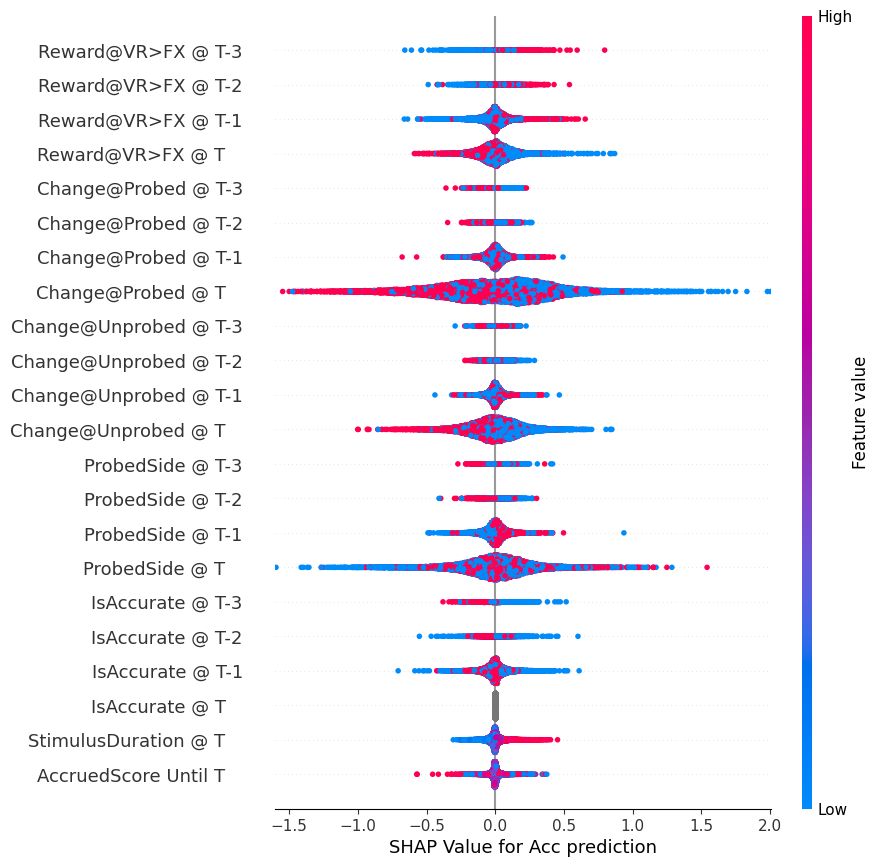

In [7]:
explanation = Explanation(values=shap_df[shap_columns].values,
                          feature_names=feature_names,
                          data=shap_df[columns].values)

numpy.random.seed(0)
beeswarm(explanation, show=False, color_bar=True, 
         order=list(range(len(explanation.feature_names))),
         max_display=len(feature_names))
pl.xlim([-1.60, 2.01])
pl.xlabel("SHAP Value for Acc prediction")
pl.show()


# Subject Wise SHAP Plot

Pending

# Other Effects

What could be interesting to check?

In [8]:
# scatter(explanation[:, 'IsAccurate @ T-1'], hist=False,
#         color=explanation[:, 'Reward@VR>FX @ T   '], 
#         show=False)
# pl.show()

# Feature Level - Summed across Time

In [9]:
# shap_columns = []
# feature_names = []

# for var, var_name in [
#     ('reward_vr_fx', 'Reward@VR>FX'), 
#     ('change_fx', 'Change@FX'), 
#     ('change_vr', 'Change@VR'),
#     ('side_probed', 'ProbedSide'), 
#     ('stimulus_time', 'StimulusDuration'), 
#     ('is_accurate', 'IsAccurate'), 
#     ('accrued_score', 'AccruedScore'),
# ]:
#     shap_columns.append(var + '_shap')
#     feature_names.append(var_name)

# print(shap_df[shap_columns].min().min())
# print(shap_df[shap_columns].max().max())


In [10]:
# explanation = Explanation(values=shap_df[shap_columns].values,
#                       feature_names=feature_names)

# beeswarm(explanation, show=False,
#          order=list(range(len(explanation.feature_names))),
#          max_display=len(feature_names))
# pl.xlim([0, 0])
# pl.xlabel("SHAP Value for Acc prediction")
# pl.show()


# Time Level - Summed across Features

In [11]:
# shap_columns = []
# feature_names = []

# for time in range(0, T+1):
#     shap_columns.append(f't{time}_shap')
#     if T-time == 0:
#         feature_names.append(f'T   ')
#     else:
#         feature_names.append(f'T-{T-time}')

# print(shap_df[shap_columns].min().min())
# print(shap_df[shap_columns].max().max())


In [12]:
# explanation = Explanation(values=shap_df[shap_columns].values,
#                       feature_names=feature_names)

# beeswarm(explanation, show=False,
#          order=list(range(len(explanation.feature_names))),
#          max_display=len(feature_names))
# pl.xlim([0, 0])
# pl.xlabel("SHAP Value for Acc prediction")
# pl.show()
